<a href="https://colab.research.google.com/github/architsharrma/TSF-Internship-Tasks/blob/master/Task_3_To_Explore_Unsupervised_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-3 TO EXPLORE UNSUPERVISED MACHINE LEARNING:

### OBJECTIVE:From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

Firstly let's import all the necessary packages or libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
iris_data=pd.read_csv('Iris.csv')

In [4]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Now we will check how many rows and columns our dataset contains:

In [5]:
iris_data.shape                  #150 rows and 6 columns

(150, 6)

Let's check unique column in species:

In [6]:
iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

check for the null values:

In [7]:
iris_data.isnull().sum()   #there is no null values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Now check some overall information related to our data.

In [8]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Now we will see some statistical information:

In [9]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


describe function tells us about the numerical values only. It tells about mean, median and quantile values and minimum and maximum. 25% is a quantile value. So for SepalLengthCm, 25% is 5.1 cm. That means that 25% of flowers have sepalLengthCm value lower than or equal to 5.1. Similarly for others. Also 50% actually is the median value of that feature, which also means that 50% of the instances have values lower than or equal to that value.

Now we don't require id column so let's just drop it.

In [10]:
iris_data.drop('Id',axis=1,inplace=True)

In [11]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris_column=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

Lets first change the categorical values to simpler one. We know that each species is of Iris flower, we will drop prefix 'Iris-' from each category.

In [13]:
iris_data.loc[iris_data["Species"] == "Iris-setosa", ["Species"]] = "Setosa"
iris_data.loc[iris_data["Species"] == "Iris-virginica", ["Species"]] = "Virginica"
iris_data.loc[iris_data["Species"] == "Iris-versicolor", ["Species"]] = "Versicolor"
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Visualization:

Plotting a simple countplot to see count:

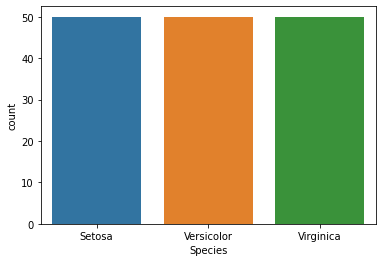

In [14]:
sns.countplot('Species',data=iris_data)

In [15]:
iris=iris_data.corr()  # using correlation we can see which all column are highly correlated with another column.

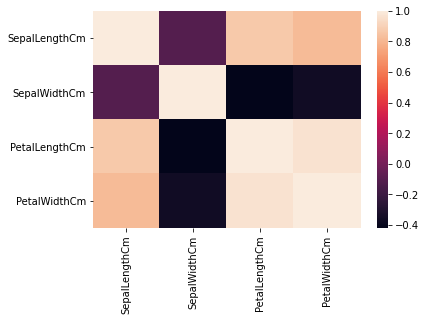

In [16]:
sns.heatmap(iris)

Now using scatter plot

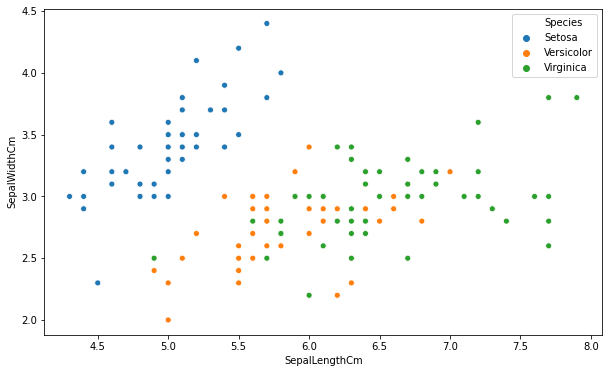

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data,hue='Species')

After analyzing above scatterplot we can see that 'sepal length' of sentosa is less than 6.0 and length of versicolor is less than virginica. 

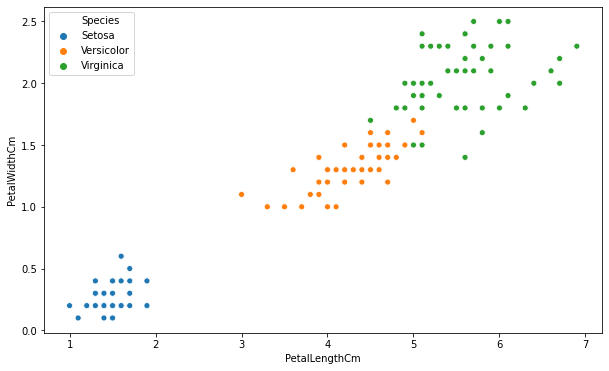

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=iris_data,hue='Species')


In above graph sentosa has very less length and width as compare to virginica.

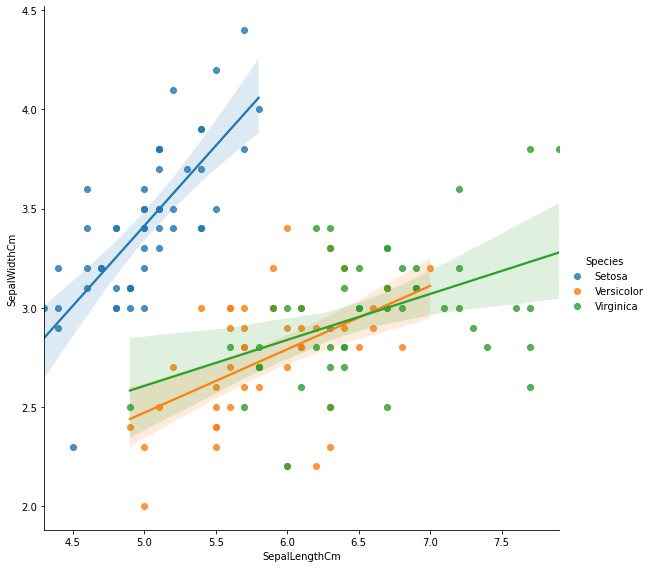

In [20]:
sns.lmplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=iris_data,height=8)

### This line gives us a more clearity with respect to sepal length and sepal width ohh by the way the line in the graph is called as regression line or linear regression which is a part of machine leaning.

<Figure size 720x432 with 0 Axes>

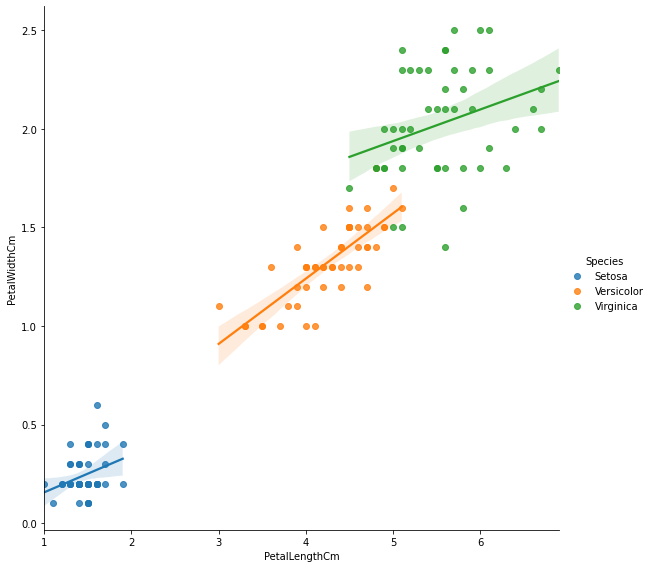

In [26]:
plt.figure(figsize=(10,6))
sns.lmplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=iris_data,height=8)

#### Now we can clearly see that setosa has very less length as compare to the width.

#### Now let's compare all the four feature individually with respect to species using visualization.

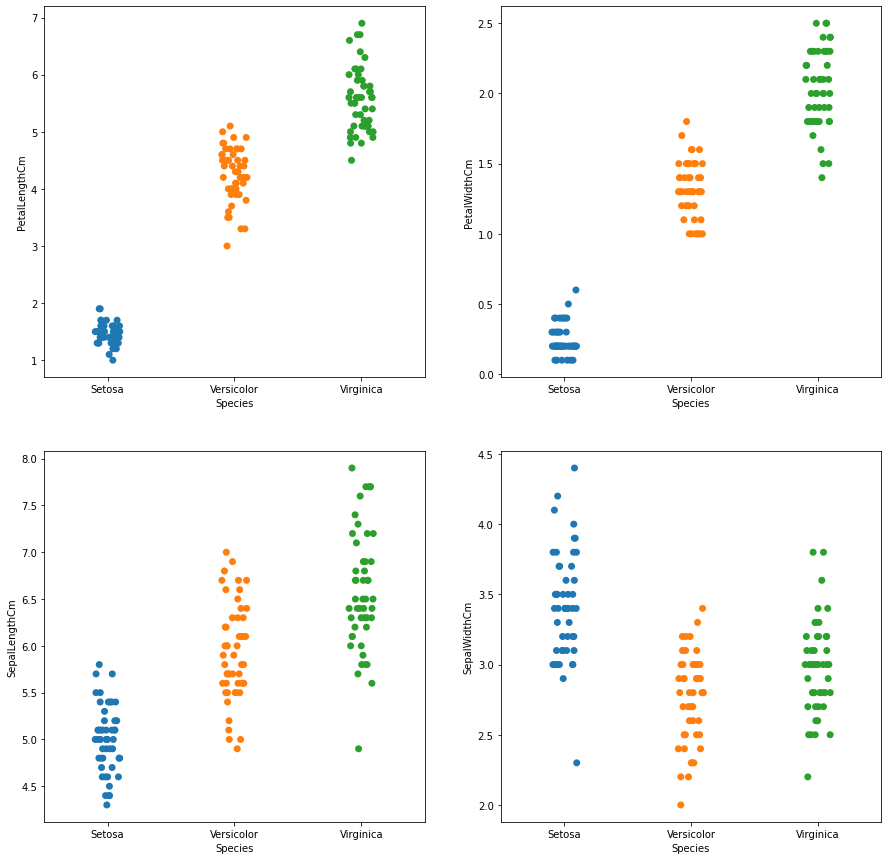

In [29]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris_data, jitter=True, size=7)
plt.subplot(2, 2, 2)
sns.stripplot(x="Species", y="PetalWidthCm", data=iris_data, jitter=True, size=7)
plt.subplot(2, 2, 3)
sns.stripplot(x="Species", y="SepalLengthCm", data=iris_data, jitter=True, size=7)
plt.subplot(2, 2, 4)
sns.stripplot(x="Species", y="SepalWidthCm", data=iris_data, jitter=True, size=7)

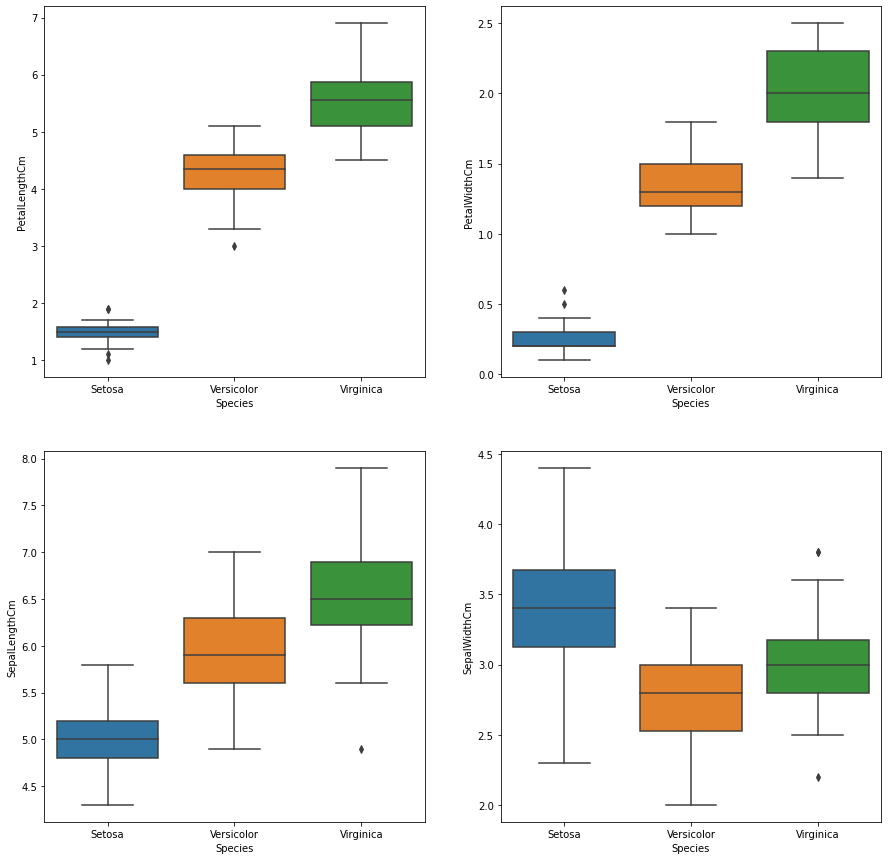

In [33]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.boxplot(x="Species", y="PetalLengthCm", data=iris_data)
plt.subplot(2, 2, 2)
sns.boxplot(x="Species", y="PetalWidthCm", data=iris_data)
plt.subplot(2, 2, 3)
sns.boxplot(x="Species", y="SepalLengthCm", data=iris_data)
plt.subplot(2, 2, 4)
sns.boxplot(x="Species", y="SepalWidthCm", data=iris_data)

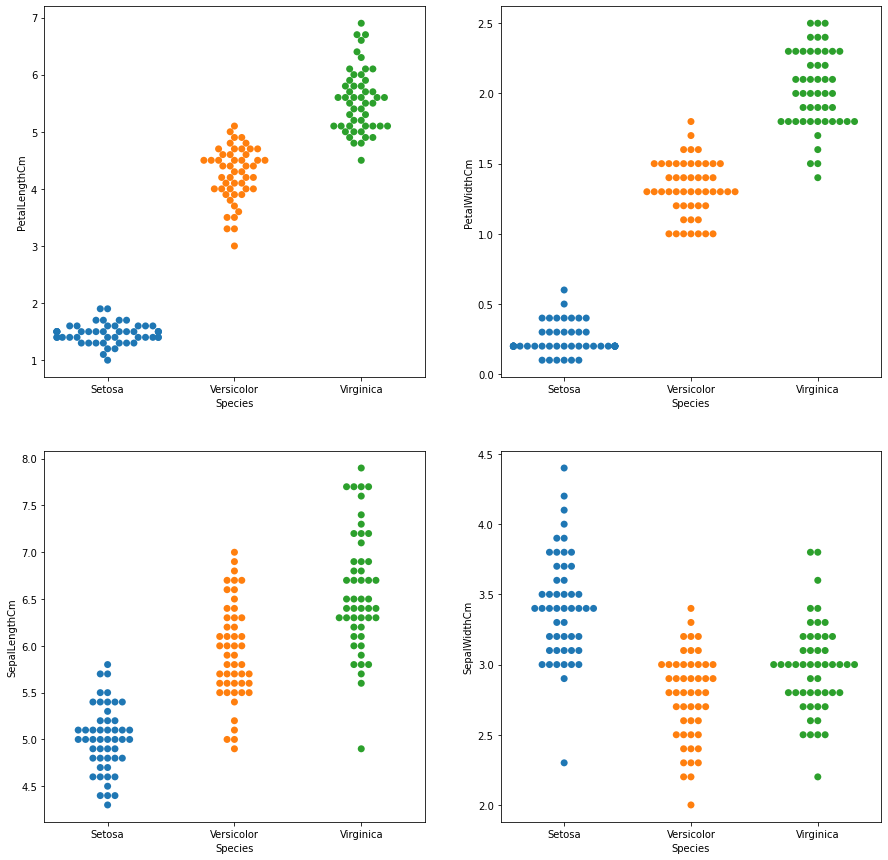

In [36]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.swarmplot(x="Species", y="PetalLengthCm", data=iris_data, size=7)
plt.subplot(2, 2, 2)
sns.swarmplot(x="Species", y="PetalWidthCm", data=iris_data,size=7)
plt.subplot(2, 2, 3)
sns.swarmplot(x="Species", y="SepalLengthCm", data=iris_data,size=7)
plt.subplot(2, 2, 4)
sns.swarmplot(x="Species", y="SepalWidthCm", data=iris_data,size=7)

#### By using these plots we can clearly analyze the species with respect to all the four feature Swarm plot shows that which particular values are coming how many times.

#### Same for Violin plots.

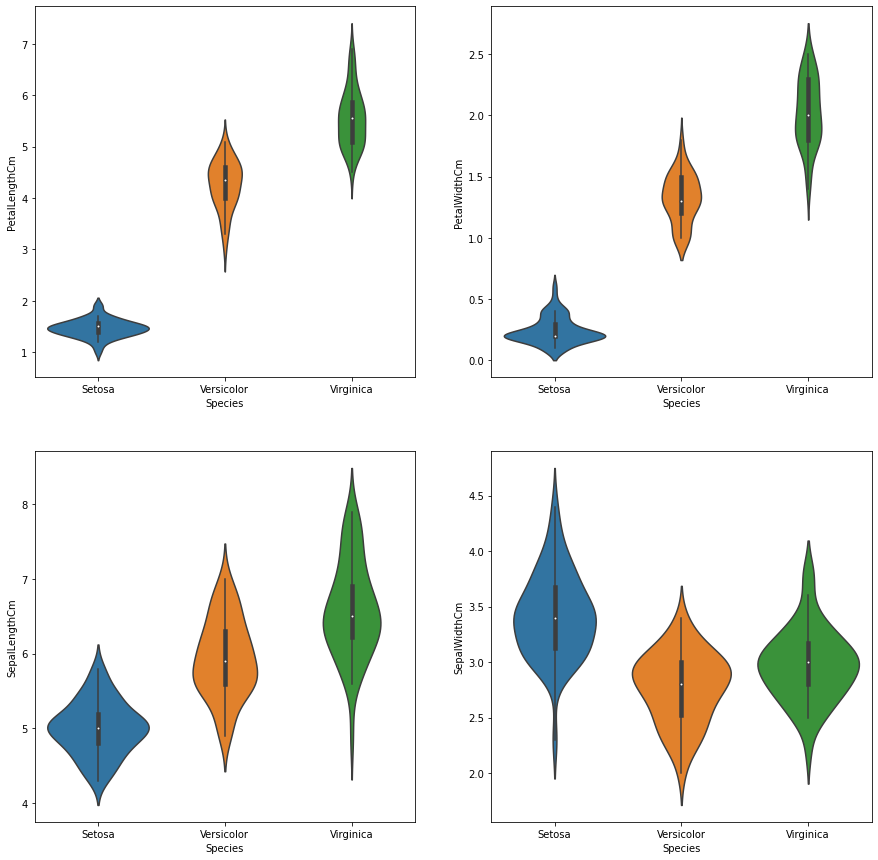

In [39]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
sns.violinplot(x="Species", y="PetalLengthCm", data=iris_data, size=7)
plt.subplot(2, 2, 2)
sns.violinplot(x="Species", y="PetalWidthCm", data=iris_data,size=7)
plt.subplot(2, 2, 3)
sns.violinplot(x="Species", y="SepalLengthCm", data=iris_data,size=7)
plt.subplot(2, 2, 4)
sns.violinplot(x="Species", y="SepalWidthCm", data=iris_data,size=7)

#### Violin plot is some what similar to box plot but violinplot actually plots the Kernel Density Estimation of underlying distribution. KDE is a fundamental data smoothing problem, which estimates the probability density function of the data is focus. 

#### Let's try for joint plot.

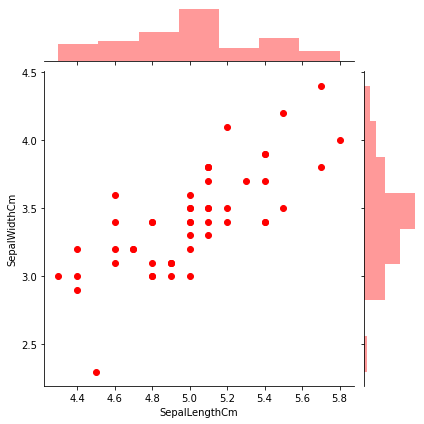

In [44]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data[iris_data['Species']=='Setosa'],color='r')


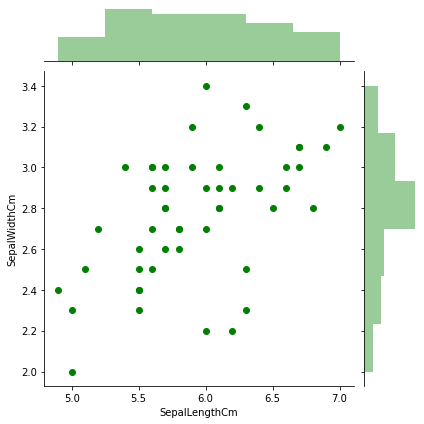

In [49]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data[iris_data['Species']=='Versicolor'],color='g')

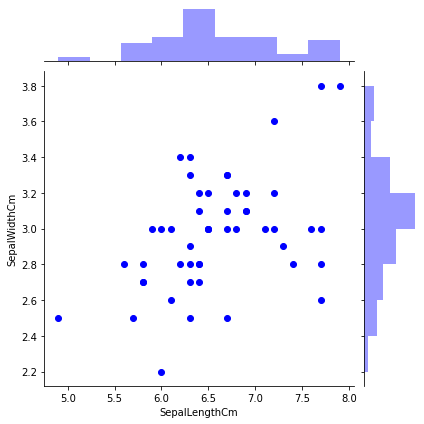

In [55]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris_data[iris_data['Species']=='Virginica'],color='b')

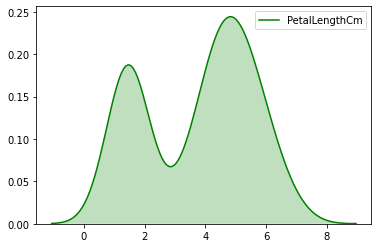

In [59]:
sns.kdeplot(data=iris_data['PetalLengthCm'],shade=True,color='g')

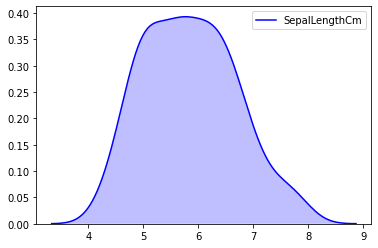

In [60]:
sns.kdeplot(data=iris_data['SepalLengthCm'],shade=True,color='b')

#### now we will use facegrid and mappping kde plot with it.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


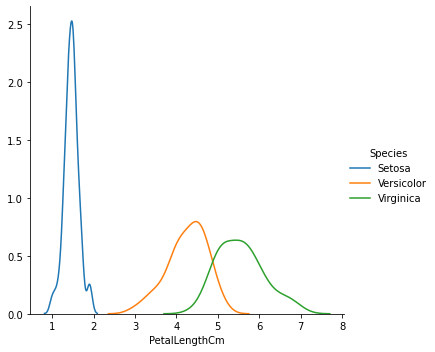

In [61]:
sns.FacetGrid(iris_data, hue="Species", size=5).map(sns.kdeplot, "PetalLengthCm").add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


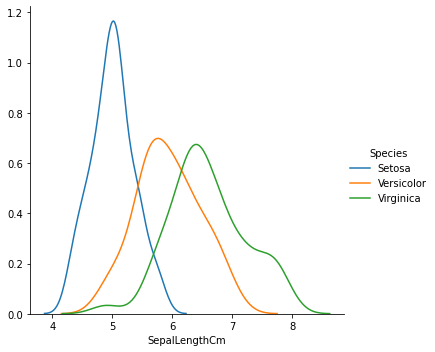

In [63]:
sns.FacetGrid(iris_data, hue="Species", size=5).map(sns.kdeplot, "SepalLengthCm").add_legend()

#### From these we can analyze in a more better way you also can use Petalwidth and Sepalwidth and then map it with facegrid plot to find some more useful pattern.

#### Now finally my favourite plot that is pair plot.

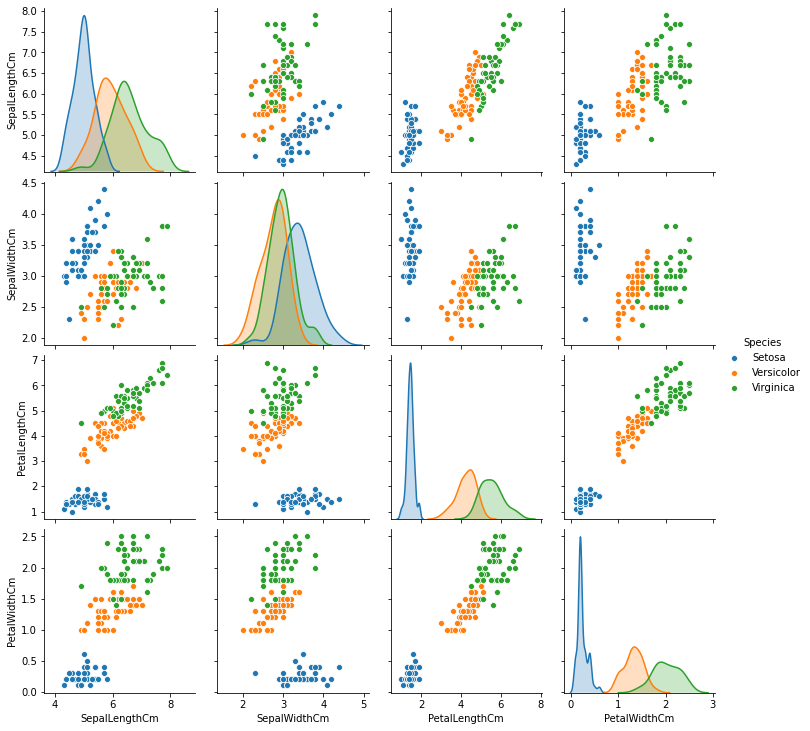

In [71]:
sns.pairplot(iris_data,diag_kind='kde',hue="Species")

#### We can see that petal width and petal length are highly correlated.

In [65]:
iris_data.orr()a

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

#### Finding the optimum number of clusters for k-means classification.

In [73]:
from sklearn.cluster import KMeans

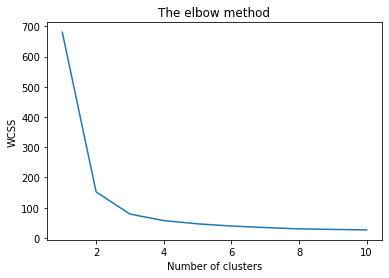

In [74]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = None)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.We observe that the optimum number of clusters is 3

#### Applying kmeans to the dataset / Creating the kmeans classifier.

In [75]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [76]:
##Visualising the clusters - On the first two columns

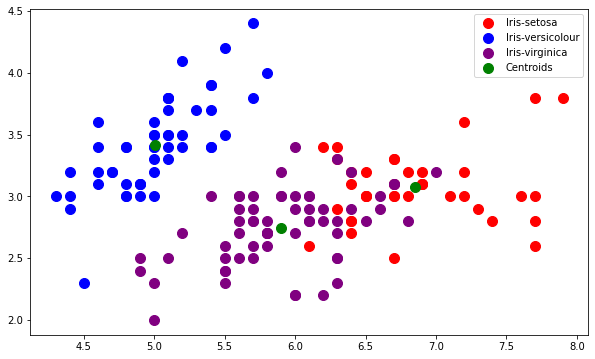

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

## This conclude K-Means.

# THANKYOU:)